In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("train (1).csv",usecols=['Age', 'Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [12]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [13]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 4.  , 31.  , 44.  ,  2.  , 37.  ,  4.  , 21.  , 31.  , 52.  ,
       47.  , 17.  , 36.  , 25.  , 50.  , 22.  , 41.  , 33.  , 16.  ,
       37.  , 29.  , 30.  , 48.  , 19.  , 25.  , 48.  , 27.  , 25.  ,
       26.  , 29.  , 54.  , 27.  , 30.  , 26.  , 30.  , 30.  , 48.  ,
       49.  , 26.  , 36.  , 11.  , 54.  ,  0.42, 59.  , 19.  , 24.  ,
       45.  , 30.  , 39.  , 29.  , 28.  , 52.  , 11.  , 32.  , 30.  ,
       18.  , 18.  , 57.  , 47.  , 16.  , 14.  , 38.  , 25.  , 15.  ,
       26.  , 54.  ,  7.  , 23.  , 31.  , 18.  , 33.  , 40.5 , 39.  ,
       32.5 , 24.  , 33.  , 70.5 , 39.  , 21.  , 36.  , 34.  , 22.  ,
        2.  , 38.  , 30.  , 18.  ,  4.  , 16.  , 22.  , 66.  , 21.  ,
       40.  , 24.  ,  4.  , 28.  , 24.  , 28.  , 14.  ,  7.  ,  3.  ,
        3.  , 32.  , 30.  , 33.  , 18.  ,  1.  , 29.  , 35.  , 36.  ,
       45.  , 36.  , 40.  ,  9.  , 52.  ,  5.  , 21.  , 31.  , 25.  ,
       42.  , 19.  , 31.  , 24.  , 46.  , 14.  , 26.  , 19.  , 25.  ,
       26.  , 26.  ,

In [14]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,16.0
493,71.0,49.5042,71.0
527,NaN,221.7792,48.0


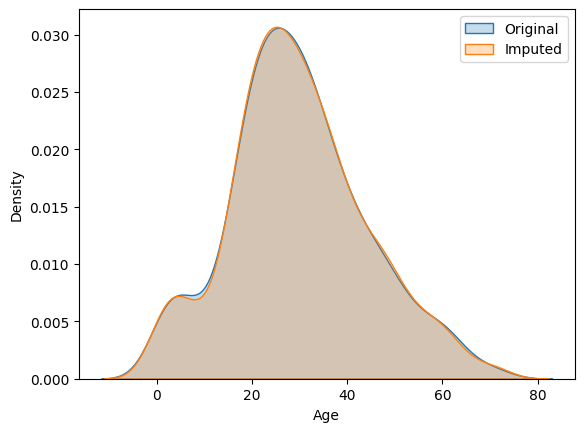

In [21]:
sns.kdeplot(X_train['Age'], label='Original', fill=True)
sns.kdeplot(X_train['Age_imputed'], label='Imputed', fill=True)

plt.legend()
plt.show()

In [22]:
print("Original Variables varaiance: ", X_train['Age'].var())
print("Variance after random imputation: ", X_train['Age_imputed'].var())

Original Variables varaiance:  204.34951339046142
Variance after random imputation:  204.33549640303258


In [23]:
X_train[['Fare','Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,58.823328
Age,71.512440,204.349513,204.349513
Age_imputed,58.823328,204.349513,204.335496


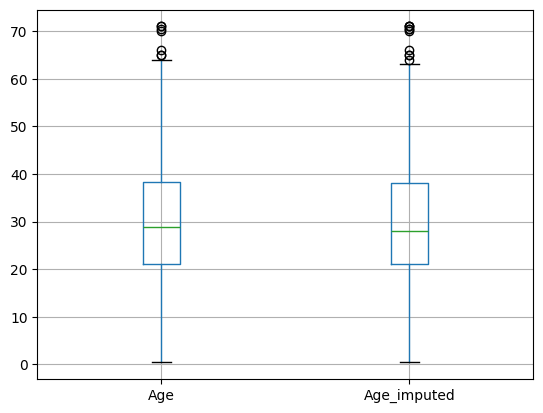

In [25]:
X_train[['Age', 'Age_imputed']].boxplot()
plt.show()

In [30]:
data = pd.read_csv("house-train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [31]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [33]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [34]:
X = data
y = data['SalePrice']

In [35]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [37]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
409,Gd,TA,339750,TA,Gd
37,TA,TA,153000,TA,TA
729,NaN,TA,103000,TA,NaN
366,Gd,TA,159000,TA,Gd
421,TA,TA,215000,TA,TA


In [38]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [39]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [40]:
temp

,original,imputed
TA,0.951087,0.952055
Fa,0.032609,0.030822
Gd,0.011775,0.012842
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [41]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp


,original,imputed
Gd,0.491143,0.647587
TA,0.405797,0.528620
Fa,0.043478,0.056117
Ex,0.033816,0.044893
Po,0.025765,0.033670


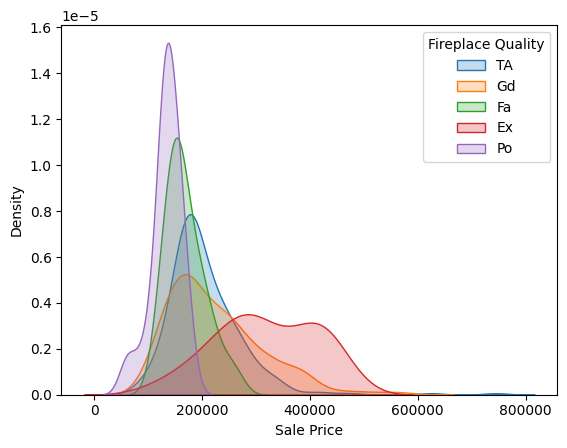

In [44]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu'] == category],
        x='SalePrice',
        label=category,
        fill=True
    )

plt.legend(title='Fireplace Quality')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.show()

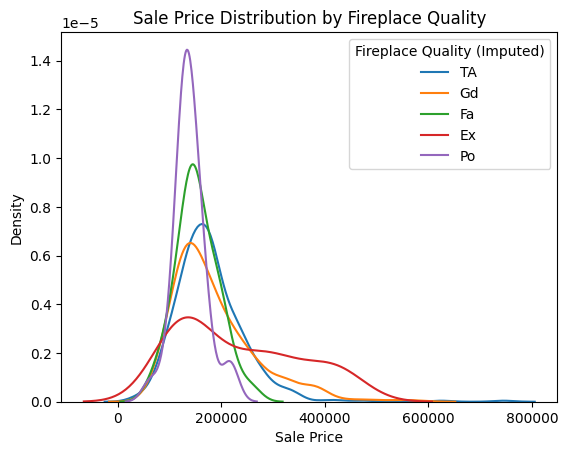

In [45]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu_imputed'] == category],
        x='SalePrice',
        label=category,
        fill=False
    )

plt.legend(title='Fireplace Quality (Imputed)')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Sale Price Distribution by Fireplace Quality')
plt.show()